<a href="https://colab.research.google.com/github/anushkaa66/BML/blob/main/BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/anushkaa66/BML.git"

Cloning into 'BML'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/hi.csv")  # Ensure the file path is correct
print("First 5 rows of data:")
print(df.head())

# Data Cleaning
df.dropna()  # Drop rows with missing values
df.drop_duplicates()  # Drop duplicate rows
print("\nData after cleaning:")
print(df)

# Dataset Info
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nChecking for Null Values:")
print(df.isnull().sum())

from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])
print("\nData after encoding categorical columns:")
print(df.head())

# Feature Scaling (Normalization & Standardization)
# Selecting only numerical columns for scaling
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns for Scaling:", numeric_columns)

# Normalization
normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(df[numeric_columns])

# Standardization
standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(df[numeric_columns])

# Print Results
#print("\nOriginal Data (Numerical Columns):\n", df[numeric_columns].head())
#print("\nNormalized Data (First 5 Rows):\n", normalized_data[:5])
#print("\nStandardized Data (First 5 Rows):\n", standardized_data[:5])

# Feature and Target Selection
# Feature and Target Selection
X = df[['Hypertension','Diabetes','Resting_BP','ECG_Results']].values  # Features # Use square brackets to select columns
y = df['Heart_Attack_Risk'].values  # Target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
model.score(X_test, y_test)




First 5 rows of data:
   Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level    BMI  \
0   69  Female        1                    0                Moderate  34.61   
1   32    Male        0                    0                Moderate  22.75   
2   89    Male        0                    1                Moderate  35.32   
3   78    Male        0                    1                Moderate  18.23   
4   38  Female        1                    0                Moderate  19.82   

   Diabetes  Hypertension  Cholesterol_Level  Resting_BP  Heart_Rate  \
0         1             0              152.1         171          85   
1         0             0              166.8         126         103   
2         0             0              272.3         123         127   
3         1             0              237.7         144         125   
4         0             0              207.7         123         107   

   Family_History Stress_Level Chest_Pain_Type        Thalassemia  \
0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5044666666666666

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB


dataset = load_iris()

# Initialize and fit the model
model = GaussianNB()
model.fit(dataset.data, dataset.target)

# Make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

accuracy = metrics.accuracy_score(expected, predicted)
print("Accuracy:", accuracy)

# Print confusion matrix
confusion_matrix = metrics.confusion_matrix(expected, predicted)
print("Confusion Matrix:\n", confusion_matrix)


Accuracy: 0.96
Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


[True, False, false] [False, true , true] [False, true , true]

regression- linear

Model Accuracy (R² score): 0.14


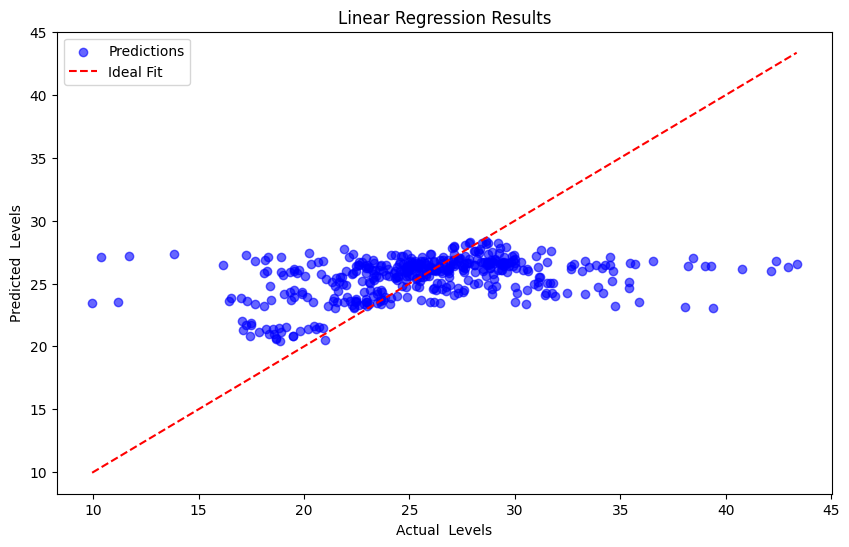

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Crop_recommendation.csv'
data = pd.read_csv(file_path)

# Encode categorical features directly
data['rainfall'] = data['rainfall'].astype('category').cat.codes

# Define features and target
features = ['N',	'P',	'K',	'humidity','ph','rainfall']
target = 'temperature'
X, y = data[features], data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and make predictions in one go
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy (R² score)
print(f"Model Accuracy (R² score): {r2:.2f}")

# Plot results
plt.figure(figsize=(10, 6))
#sets the size of the figure
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
#Create a scatter plot of actual vs. predicted cholesterol levels.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
#Plot a red dashed line representing perfect predictions.
plt.xlabel("Actual  Levels")
#name of the x axes
plt.ylabel("Predicted  Levels")
#name of the y axes
plt.title("Linear Regression Results")
#title of the graph
plt.legend()
plt.show()


